<font size=7> Circuit Diagram

In [1]:
#from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, cross_sttc, plot_pair_analysis, plot_cross_sttc_pairs
from human_hip import spike_data
import pickle
import matplotlib.pyplot as plt
#from ipywidgets import interact_manual
import numpy as np

# Old Code

In [2]:
from matplotlib import pyplot as plt
from matplotlib.patches import FancyArrow
from sklearn import preprocessing
import numpy as np
from human_hip.spike_data import latencies, latency_times, plot_raster, plot_footprint, cross_sttc
from braingeneers.analysis.analysis import SpikeData
import warnings
import diptest 
import math
import matplotlib.cm as cm
from ipywidgets import interact_manual
from matplotlib.ticker import MaxNLocator

In [3]:


# The function creates  plot of arrows show the direction that information is flowing out of neurons
def plot_vector_layout( sd, pairs, normalize=True, plot_neuron=True, arrow_length=75, min_dist=0, image_path=None, xlim=None, ylim=None, background_color="white" ):
    """
    Inputs:
        pairs: np.array of neuron indices (as pairs) for which a connection exists, ex: [[0,1], [0,2], [2,3]]
        lags: np.array of the average lag time in ms corresponding to the neuron pairs, ex: [1, 3, -4]
        normalize: boolean, if True, all arrows will be the same length, if False, arrows will point to the ending neuron
        arrow_length: integer of how long the arrows should be drawn on the final plot
    Outputs:
        A plot depicting th 2D locations of neurons, with arrows showing the direction of information flow
    """
    # Get the x/y locations of the start and end neurons of each pair
    neuron_xy = []
    for neuron in sd.neuron_data[0].values():
        neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
    neuron_xy = np.array(neuron_xy)

    # Plot original scatter
    plt.figure(figsize=(8, 8))
    ax = plt.axes()
    ax.set_facecolor(background_color)
    if image_path is not None:
        img = plt.imread(image_path)      # Load in image
        plt.imshow(img,  extent=[0, 3850, 0, 2100]) 
    if plot_neuron:
        plt.scatter( neuron_xy[:,0], neuron_xy[:,1], alpha=0.15, c='grey')
    plt.xlim( xlim )
    plt.ylim( ylim )    

    # make pairs point in same direction
    pairs = pairs                         # make a copy of pairs, this avoids some bug
    for i in range(len(pairs)):
        lag = np.median(latencies( pairs[i][0], pairs[i][1], sd, ms_cutoff_high=20))
        if lag<0:
            pairs[i] = [ pairs[i][1], pairs[i][0] ]

    # Creat arrows show angle of information flow from a neuron
    starts = neuron_xy[ pairs[:,0] ]  # Get the x/y locations of the start and end neurons of each pair
    ends = neuron_xy[ pairs[:,1] ]
    centered = ends-starts   # Get the directions of arrows, then make of of them the same length
    normalized = preprocessing.normalize(centered) * arrow_length if normalize else centered # make same lengths, unless told otherwise
    
    # Draw Arrows
    cmap = cm.get_cmap('hsv')
    for i in range(len(starts)):
        if math.dist(starts[i], ends[i]) < min_dist:
            continue
        angle = (math.atan2(-(ends[i][1]-starts[i][1]), ends[i][0]-starts[i][0]) + np.pi) / (2 * np.pi)
        arrow = FancyArrow( 
                starts[i][0], starts[i][1], normalized[i][0], normalized[i][1], length_includes_head=True, head_width=25,
                linewidth=1, color=cmap(angle), alpha=0.9 ) #color="red"
        plt.gca().add_patch(arrow)



# HC112328 - Kainic Acid <font color="orange"> (dummy data)

In [4]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [5]:
with open( '/workspaces/human_hippocampus/experiments/dentate_gyrus/hc112823/kanaic_acid/curate_latencies_good_pairs.pkl' , 'rb') as my_file:
    good_pairs = pickle.load(my_file)

In [6]:
plot_vector_layout

<function __main__.plot_vector_layout(sd, pairs, normalize=True, plot_neuron=True, arrow_length=75, min_dist=0, image_path=None, xlim=None, ylim=None, background_color='white')>

/tmp/ipykernel_6265/11636267.py:14: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_6265/11636267.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')


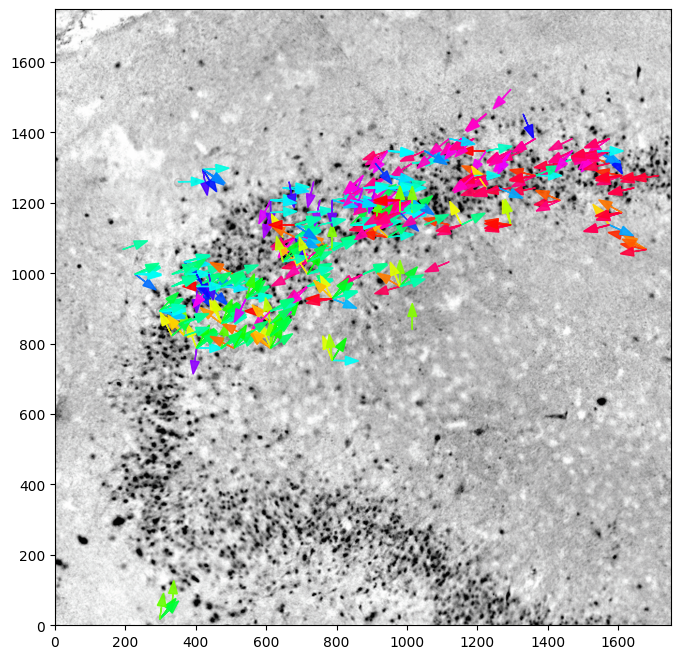

In [8]:
plot_vector_layout( sd, good_pairs, image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw.png",
                     xlim=(0,1750), ylim=(0,1750) )

# HC21769 - Kainic Acid <font color="orange"> (dummy data)